In [617]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

In [618]:
data_path = './data/smartwatches.csv'
df = pd.read_csv(data_path)
df.drop_duplicates(inplace=True)
# train_df = df.sample(frac=0.8,random_state=42)
# test_df = df.drop(train_df.index)
# train_df = train_df.reset_index()
# test_df = test_df.reset_index()

In [619]:
train_df = df.copy()

In [620]:
df.shape,train_df.shape

((450, 16), (450, 16))

In [621]:
train_df.head()

,Unnamed: 0,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


In [622]:
train_df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [623]:
train_df.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


Feature Engineering
distinguish in categorical and numerical data

In [624]:
train_df['Display Size'].isna().sum()

30

In [625]:
train_df['Display Size'].value_counts().count()

40

In [626]:
train_df['Display Size'].fillna('0.0 inches',inplace=True)

C:\Users\vikas\AppData\Local\Temp\ipykernel_11852\2667962480.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Display Size'].fillna('0.0 inches',inplace=True)


In [627]:
train_df['Display Size'].isna().sum()

0

In [628]:
float('0.0 inches'.split()[0])

0.0

In [629]:
train_df['Display Size']=train_df['Display Size'].apply(lambda x:float(x.split()[0]))

In [630]:
train_df.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,0.0,35 - 50 g
1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8,50 - 75 g
2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7,35 - 50 g
3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8,75g +
4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7,35 - 50 g


In [631]:
train_df['Display Size'].replace(0.0, np.nan, inplace=True)

C:\Users\vikas\AppData\Local\Temp\ipykernel_11852\1243258204.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Display Size'].replace(0.0, np.nan, inplace=True)


In [632]:
train_df['Display Size'].isna().sum()

31

In [633]:
train_df['Weight'].value_counts()

Weight
20 - 35 g    80
75g +        66
35 - 50 g    58
<= 20 g      43
50 - 75 g    17
Name: count, dtype: int64

In [634]:
re.findall('\d+','20 - 35 g ')

['20', '35']

In [635]:
cal = sum([int(x) for x in re.findall('\d+','20 - 35 g')])/2
train_df['Weight'].replace('20 - 35 g', cal ,inplace=True)

C:\Users\vikas\AppData\Local\Temp\ipykernel_11852\1236606372.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weight'].replace('20 - 35 g', cal ,inplace=True)


In [636]:
cal = sum([int(x) for x in re.findall('\d+','35 - 50 g')])/2
train_df['Weight'].replace('35 - 50 g', cal ,inplace=True)

C:\Users\vikas\AppData\Local\Temp\ipykernel_11852\2028924899.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weight'].replace('35 - 50 g', cal ,inplace=True)


In [637]:
cal = sum([int(x) for x in re.findall('\d+','50 - 75 g')])/2
train_df['Weight'].replace('50 - 75 g', cal ,inplace=True)

C:\Users\vikas\AppData\Local\Temp\ipykernel_11852\2351750431.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weight'].replace('50 - 75 g', cal ,inplace=True)


In [638]:
train_df['Weight'].replace('75g +', float(re.findall('\d+','75g +')[0]),inplace=True)

C:\Users\vikas\AppData\Local\Temp\ipykernel_11852\1940579822.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weight'].replace('75g +', float(re.findall('\d+','75g +')[0]),inplace=True)


In [639]:
train_df['Weight'].replace('<= 20 g', float(re.findall('\d+','<= 20 g')[0]),inplace=True)

C:\Users\vikas\AppData\Local\Temp\ipykernel_11852\871100018.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weight'].replace('<= 20 g', float(re.findall('\d+','<= 20 g')[0]),inplace=True)
C:\Users\vikas\AppData\Local\Temp\ipykernel_11852\871100018.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasti

In [640]:
train_df['Weight'].value_counts()

Weight
27.5    80
75.0    66
42.5    58
20.0    43
62.5    17
Name: count, dtype: int64

In [641]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                450 non-null    object 
 1   Current Price        440 non-null    float64
 2   Original Price       377 non-null    float64
 3   Discount Percentage  377 non-null    float64
 4   Rating               444 non-null    float64
 5   Number OF Ratings    391 non-null    float64
 6   Model Name           415 non-null    object 
 7   Dial Shape           327 non-null    object 
 8   Strap Color          327 non-null    object 
 9   Strap Material       381 non-null    object 
 10  Touchscreen          413 non-null    object 
 11  Battery Life (Days)  418 non-null    float64
 12  Bluetooth            444 non-null    object 
 13  Display Size         419 non-null    float64
 14  Weight               264 non-null    float64
dtypes: float64(8), object(7)
memory usage: 5

In [642]:
train_df.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,42.5
1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8,62.5
2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7,42.5
3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8,75.0
4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7,42.5


In [643]:
train_df['Discount Price'] = (train_df['Original Price']* (-train_df['Discount Percentage']))/100

In [644]:
train_df.drop(['Discount Percentage'],axis=1,inplace=True)

Numerical Data

In [645]:
numerical_col = [feature for feature in train_df.columns if train_df[feature].dtype == 'float64']

In [646]:
numerical_col

['Current Price',
 'Original Price',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)',
 'Display Size',
 'Weight',
 'Discount Price']

In [647]:
train_df[numerical_col].head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price
0,82990.0,89900.0,4.0,65.0,8.0,NaN,42.5,-6910.000000
1,3799.0,16999.0,4.3,20788.0,3.5,1.8,62.5,-13200.000001
2,1999.0,7990.0,3.8,21724.0,8.0,1.7,42.5,-5991.000000
3,1799.0,19999.0,4.3,13244.0,3.5,1.8,75.0,-18200.000000
4,1599.0,4999.0,4.1,13901.0,8.0,1.7,42.5,-3400.000000


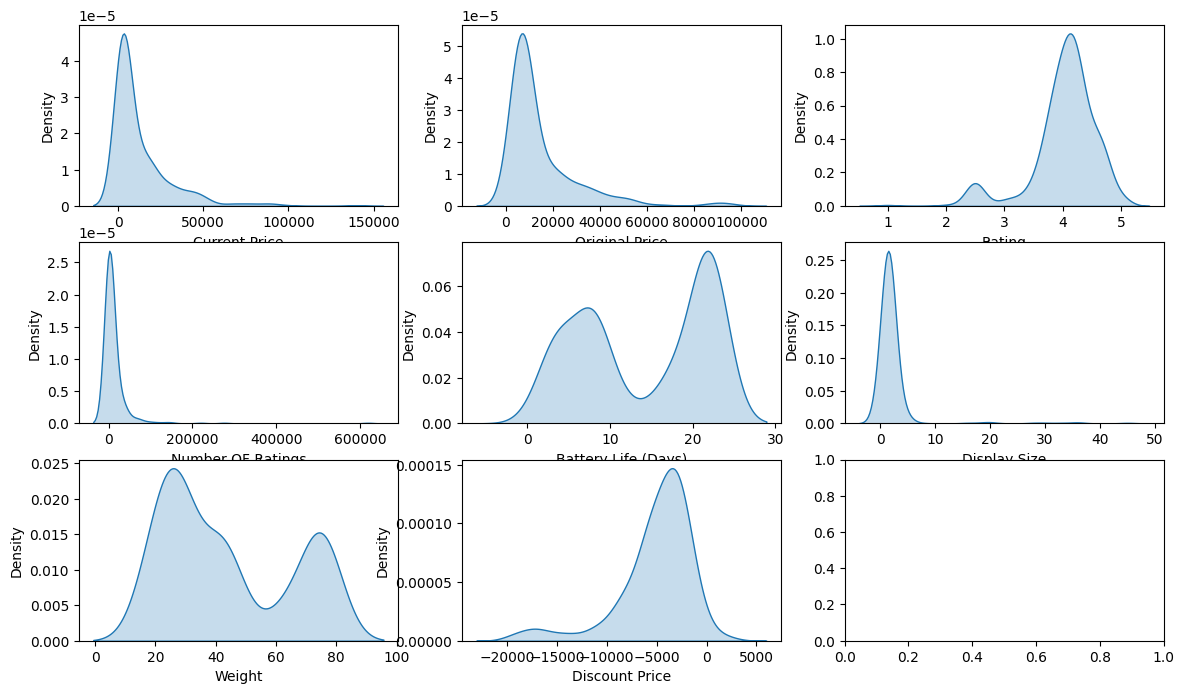

In [648]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14,8))

for i, colum in enumerate(numerical_col):
    row = i//3
    col = i%3
    ax = axes[row,col]
    sns.kdeplot(data = train_df[colum],ax = ax,fill=True)

plt.show()

as the whole data present in the form of skewed format 
current price is right skewed and rating is left skewed
so we can't use mean value to avoid null values so for that we have to use median values

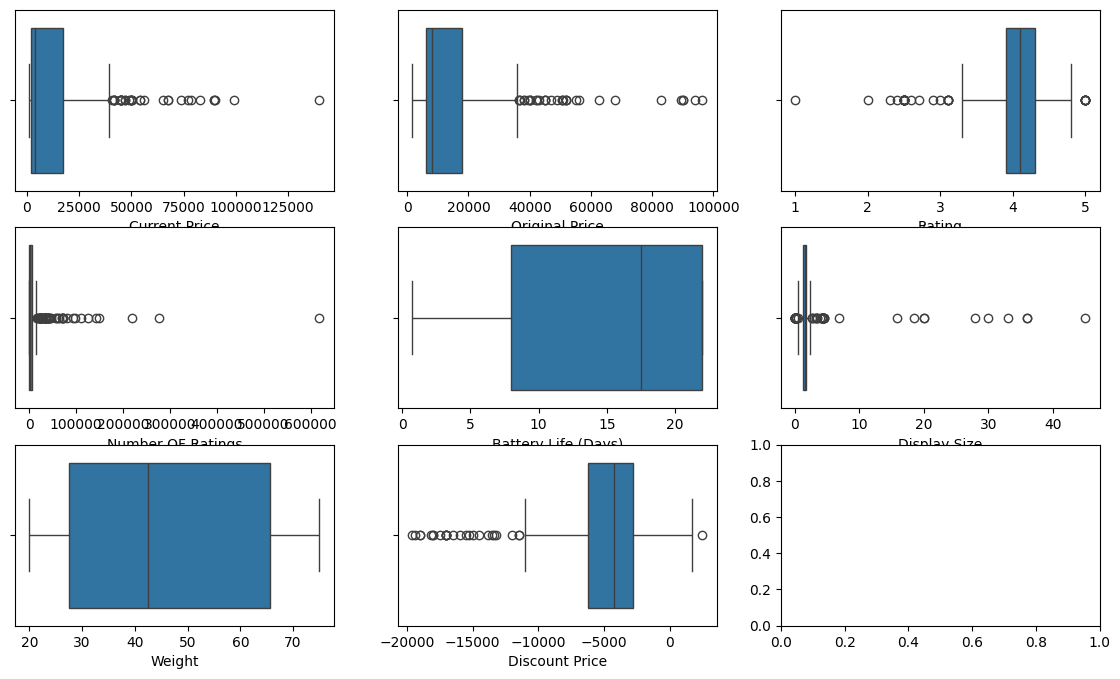

In [649]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14,8))

for i, colum in enumerate(numerical_col):
    row = i//3
    col = i%3
    ax = axes[row,col]
    sns.boxplot(x = train_df[colum],ax = ax)

plt.show()

In [650]:
train_df.shape

(450, 15)

dotted ones are the outliers so we can see that there are too many outliers there

removing outliers

In [651]:
def remove_outliers_IQR(data,col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col]>lower_bound) & (data[col]<upper_bound)]

In [652]:
train_df.columns

Index(['Brand', 'Current Price', 'Original Price', 'Rating',
       'Number OF Ratings', 'Model Name', 'Dial Shape', 'Strap Color',
       'Strap Material', 'Touchscreen', 'Battery Life (Days)', 'Bluetooth',
       'Display Size', 'Weight', 'Discount Price'],
      dtype='object')

In [653]:
train_df.shape

(450, 15)

In [654]:
import_col = ['Current Price', 'Original Price', 'Rating','Number OF Ratings','Display Size']

In [655]:
for col in import_col:
    train_df = remove_outliers_IQR(train_df,col)

imputation of null values

In [656]:
for col in numerical_col:
    print(col)
    train_df[col].fillna(train_df[col].median(),inplace=True)
    

Current Price
Original Price
Rating
Number OF Ratings
Battery Life (Days)
Display Size
Weight
Discount Price


C:\Users\vikas\AppData\Local\Temp\ipykernel_11852\2115102621.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].median(),inplace=True)
C:\Users\vikas\AppData\Local\Temp\ipykernel_11852\2115102621.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [657]:
train_df.isna().sum()

Brand                   0
Current Price           0
Original Price          0
Rating                  0
Number OF Ratings       0
Model Name              9
Dial Shape             65
Strap Color            65
Strap Material         26
Touchscreen             6
Battery Life (Days)     0
Bluetooth               0
Display Size            0
Weight                  0
Discount Price          0
dtype: int64

In [658]:
train_df[numerical_col].head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price
1,3799.0,16999.0,4.3,20788.0,3.5,1.8,62.5,-13200.000001
2,1999.0,7990.0,3.8,21724.0,8.0,1.7,42.5,-5991.000000
3,1799.0,19999.0,4.3,13244.0,3.5,1.8,75.0,-18200.000000
4,1599.0,4999.0,4.1,13901.0,8.0,1.7,42.5,-3400.000000
5,1499.0,3999.0,4.0,32704.0,8.0,1.7,42.5,-2500.000000


In [659]:
from sklearn.preprocessing import MinMaxScaler

In [660]:
scaler = MinMaxScaler()

In [661]:
data = scaler.fit_transform(train_df[numerical_col[:-1]])

In [662]:
data

array([[0.1116311 , 0.56836451, 0.83333333, ..., 0.12941176, 0.61538462,
        0.77272727],
       [0.03434803, 0.22996018, 0.41666667, ..., 0.34117647, 0.53846154,
        0.40909091],
       [0.02576102, 0.68105326, 0.83333333, ..., 0.12941176, 0.61538462,
        1.        ],
       ...,
       [0.02996866, 0.00116445, 0.        , ..., 1.        , 1.        ,
        0.40909091],
       [0.12021811, 0.30542409, 0.33333333, ..., 1.        , 0.53846154,
        0.40909091],
       [0.12021811, 0.30542409, 0.33333333, ..., 1.        , 0.53846154,
        0.40909091]])

In [663]:
data = pd.DataFrame(data,columns=numerical_col[:-1])

In [664]:
data.head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight
0,0.111631,0.568365,0.833333,0.622082,0.129412,0.615385,0.772727
1,0.034348,0.229960,0.416667,0.650096,0.341176,0.538462,0.409091
2,0.025761,0.681053,0.833333,0.396295,0.129412,0.615385,1.000000
3,0.017174,0.117609,0.666667,0.415958,0.341176,0.538462,0.409091
4,0.012881,0.080047,0.583333,0.978720,0.341176,0.538462,0.409091


In [665]:
data.shape , train_df.shape

((181, 7), (181, 15))

In [666]:
pd.concat([train_df.reset_index(),data],axis=1).shape

(181, 23)

In [667]:
train_df = pd.concat([train_df.reset_index(),data],axis=1)

In [668]:
data.isna().sum()

Current Price          0
Original Price         0
Rating                 0
Number OF Ratings      0
Battery Life (Days)    0
Display Size           0
Weight                 0
dtype: int64

In [669]:
train_df.drop(numerical_col[:-1],axis=1,inplace=True)

In [670]:
train_df.head()

,index,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth,Discount Price
0,1,fire-boltt,BSW046,NaN,NaN,Silicon,Yes,Yes,-13200.000001
1,2,boat,Wave Call,NaN,NaN,Silicon,Yes,Yes,-5991.000000
2,3,fire-boltt,BSW053,NaN,NaN,Silicon,Yes,Yes,-18200.000000
3,4,noise,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,Yes,-3400.000000
4,5,noise,NSW-05,NaN,NaN,Other,Yes,Yes,-2500.000000


In [671]:
train_df = pd.concat([train_df,data],axis=1)

In [672]:
train_df.head()

,index,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth,Discount Price,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight
0,1,fire-boltt,BSW046,NaN,NaN,Silicon,Yes,Yes,-13200.000001,0.111631,0.568365,0.833333,0.622082,0.129412,0.615385,0.772727
1,2,boat,Wave Call,NaN,NaN,Silicon,Yes,Yes,-5991.000000,0.034348,0.229960,0.416667,0.650096,0.341176,0.538462,0.409091
2,3,fire-boltt,BSW053,NaN,NaN,Silicon,Yes,Yes,-18200.000000,0.025761,0.681053,0.833333,0.396295,0.129412,0.615385,1.000000
3,4,noise,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,Yes,-3400.000000,0.017174,0.117609,0.666667,0.415958,0.341176,0.538462,0.409091
4,5,noise,NSW-05,NaN,NaN,Other,Yes,Yes,-2500.000000,0.012881,0.080047,0.583333,0.978720,0.341176,0.538462,0.409091


In [673]:
train_df[numerical_col]

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price
0,0.111631,0.568365,0.833333,0.622082,0.129412,0.615385,0.772727,-13200.000001
1,0.034348,0.229960,0.416667,0.650096,0.341176,0.538462,0.409091,-5991.000000
2,0.025761,0.681053,0.833333,0.396295,0.129412,0.615385,1.000000,-18200.000000
3,0.017174,0.117609,0.666667,0.415958,0.341176,0.538462,0.409091,-3400.000000
4,0.012881,0.080047,0.583333,0.978720,0.341176,0.538462,0.409091,-2500.000000
...,...,...,...,...,...,...,...,...
176,0.184621,0.211517,0.500000,0.000569,1.000000,0.615385,0.409091,-2000.000000
177,0.068696,0.136391,0.500000,0.000569,1.000000,0.538462,0.409091,-2700.000000
178,0.029969,0.001164,0.000000,0.000030,1.000000,1.000000,0.409091,-2.000000
179,0.120218,0.305424,0.333333,0.000000,1.000000,0.538462,0.409091,-6000.000000


In [674]:
train_df.shape

(181, 16)

Categorical Columns

In [675]:
categorical_col = [feature for feature in train_df.columns if train_df[feature].dtype=='object']
categorical_col

['Brand',
 'Model Name',
 'Dial Shape',
 'Strap Color',
 'Strap Material',
 'Touchscreen',
 'Bluetooth']

In [676]:
train_df[categorical_col].head()

,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth
0,fire-boltt,BSW046,NaN,NaN,Silicon,Yes,Yes
1,boat,Wave Call,NaN,NaN,Silicon,Yes,Yes
2,fire-boltt,BSW053,NaN,NaN,Silicon,Yes,Yes
3,noise,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,Yes
4,noise,NSW-05,NaN,NaN,Other,Yes,Yes


In [677]:
train_df['Bluetooth'].value_counts(),train_df['Touchscreen'].value_counts()

(Bluetooth
 Yes    181
 Name: count, dtype: int64,
 Touchscreen
 Yes    174
 No       1
 Name: count, dtype: int64)

since Bluetooth has only one data so lets remove it 

In [678]:
categorical_col.remove('Bluetooth')

One way annova test

In [679]:
from scipy.stats import f_oneway

In [680]:
for col in categorical_col:
    CategoryGroupLists = train_df.groupby(col)['Discount Price'].apply(list)
    AnnovaResults = f_oneway(*CategoryGroupLists)
    print(col,': ','P-Value for anova is : ',AnnovaResults[1])

Brand :  P-Value for anova is :  8.421850586222264e-14
Model Name :  P-Value for anova is :  4.2637443020007396e-05
Dial Shape :  P-Value for anova is :  0.00012368727588900151
Strap Color :  P-Value for anova is :  0.06574836943894022
Strap Material :  P-Value for anova is :  0.00039800860157354607
Touchscreen :  P-Value for anova is :  0.9803878528536757


In [681]:
imp_col = ['Brand','Model Name','Dial Shape','Strap Material']

In [682]:
train_df[imp_col].head()

,Brand,Model Name,Dial Shape,Strap Material
0,fire-boltt,BSW046,NaN,Silicon
1,boat,Wave Call,NaN,Silicon
2,fire-boltt,BSW053,NaN,Silicon
3,noise,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,Other
4,noise,NSW-05,NaN,Other


In [683]:
train_df[imp_col].isna().sum()

Brand              0
Model Name         9
Dial Shape        65
Strap Material    26
dtype: int64

In [684]:
for col in imp_col:
    train_df[col].fillna('other',inplace=True)

C:\Users\vikas\AppData\Local\Temp\ipykernel_11852\3556337164.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna('other',inplace=True)


In [685]:
brand = pd.get_dummies(train_df['Brand'])
brand = brand.astype(int)
model_name = pd.get_dummies(train_df['Model Name']).drop(['other'],axis=1)
model_name = model_name.astype(int)
dial_shape = pd.get_dummies(train_df['Dial Shape']).drop(['other'],axis=1)
dial_shape = dial_shape.astype(int)
strap_material = pd.get_dummies(train_df['Strap Material']).drop(['other'],axis=1)
strap_material = strap_material.astype(int)

In [686]:
imp_df = pd.concat([brand,model_name,dial_shape,strap_material],axis=1)

In [687]:
imp_df.head()

,amazfit,ambrane,boat,crossbeats,dizo,fire-boltt,fitbit,fossil,garmin,gizmore,...,Leather,Metal,Nylon,Other,Plastic,Rubber,Silicon,Stainless Steel,Synthetic,Thermo Plastic Polyurethene
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [688]:
new_df = pd.concat([train_df[numerical_col],imp_df],axis=1)

In [689]:
new_df.head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price,amazfit,ambrane,...,Leather,Metal,Nylon,Other,Plastic,Rubber,Silicon,Stainless Steel,Synthetic,Thermo Plastic Polyurethene
0,0.111631,0.568365,0.833333,0.622082,0.129412,0.615385,0.772727,-13200.000001,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.034348,0.229960,0.416667,0.650096,0.341176,0.538462,0.409091,-5991.000000,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.025761,0.681053,0.833333,0.396295,0.129412,0.615385,1.000000,-18200.000000,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.017174,0.117609,0.666667,0.415958,0.341176,0.538462,0.409091,-3400.000000,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.012881,0.080047,0.583333,0.978720,0.341176,0.538462,0.409091,-2500.000000,0,0,...,0,0,0,1,0,0,0,0,0,0


In [691]:
new_df.isna().sum()

Current Price                  0
Original Price                 0
Rating                         0
Number OF Ratings              0
Battery Life (Days)            0
                              ..
Rubber                         0
Silicon                        0
Stainless Steel                0
Synthetic                      0
Thermo Plastic Polyurethene    0
Length: 202, dtype: int64